# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Inspecting the data
1)looking shape ,size,type,info,describe,index,columns,nullvalues,duplicate values

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(891, 12)

In [5]:
df.size

10692

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there are 687 data missing in Cabin column so dropping it

In [14]:
df=df.drop("Cabin",axis=1)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


PassengerId,Name and Ticket can also be dropped

In [16]:
df.drop(columns=["Name","PassengerId","Ticket"],inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
df["Sex"]=df["Sex"].map({"female":0,"male":1})

In [19]:
df.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [21]:
## Alternative method
##from sklearn.preprocessing import LabelEncoder
##le=LabelEncoder()
##df["Sex"]=le.fit_transform(df["Sex"])

In [22]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [24]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
df=pd.get_dummies(df,columns=["Embarked"])

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [27]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [28]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [29]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


# Distribution curve

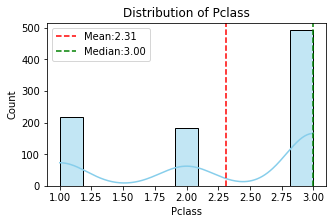

In [31]:
col=df["Pclass"]
mean_val=np.mean(col)
median_val=np.median(col)
mode_value=col.mode()[0]
plt.figure(figsize=(5,3))
sns.histplot(col,kde=True,color="skyblue")
plt.axvline(mean_val,color="red",linestyle="--",label=f"Mean:{mean_val:.2f}")
plt.axvline(median_val,color="green",linestyle="--",label=f"Median:{median_val:.2f}")
plt.legend()
plt.title("Distribution of Pclass")
plt.show()

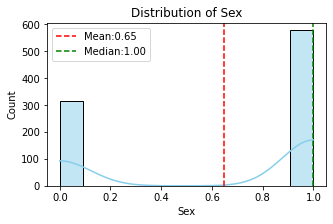

In [32]:
col=df["Sex"]
mean_val=np.mean(col)
median_val=np.median(col)
mode_value=col.mode()[0]
plt.figure(figsize=(5,3))
sns.histplot(col,kde=True,color="skyblue")
plt.axvline(mean_val,color="red",linestyle="--",label=f"Mean:{mean_val:.2f}")
plt.axvline(median_val,color="green",linestyle="--",label=f"Median:{median_val:.2f}")
plt.legend()
plt.title("Distribution of Sex")
plt.show()

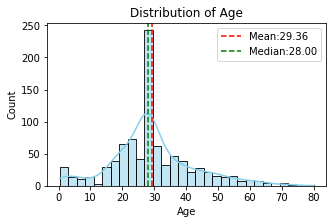

In [33]:
col=df["Age"]
mean_val=np.mean(col)
median_val=np.median(col)
mode_value=col.mode()[0]
plt.figure(figsize=(5,3))
sns.histplot(col,kde=True,color="skyblue")
plt.axvline(mean_val,color="red",linestyle="--",label=f"Mean:{mean_val:.2f}")
plt.axvline(median_val,color="green",linestyle="--",label=f"Median:{median_val:.2f}")
plt.legend()
plt.title("Distribution of Age")
plt.show()

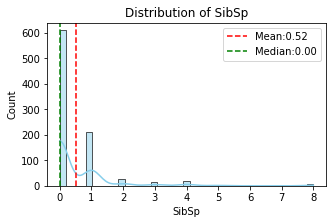

In [35]:
col=df["SibSp"]
mean_val=np.mean(col)
median_val=np.median(col)
mode_value=col.mode()[0]
plt.figure(figsize=(5,3))
sns.histplot(col,kde=True,color="skyblue")
plt.axvline(mean_val,color="red",linestyle="--",label=f"Mean:{mean_val:.2f}")
plt.axvline(median_val,color="green",linestyle="--",label=f"Median:{median_val:.2f}")
plt.legend()
plt.title("Distribution of SibSp")
plt.show()

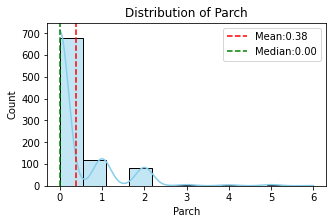

In [37]:
col=df["Parch"]
mean_val=np.mean(col)
median_val=np.median(col)
mode_value=col.mode()[0]
plt.figure(figsize=(5,3))
sns.histplot(col,kde=True,color="skyblue")
plt.axvline(mean_val,color="red",linestyle="--",label=f"Mean:{mean_val:.2f}")
plt.axvline(median_val,color="green",linestyle="--",label=f"Median:{median_val:.2f}")
plt.legend()
plt.title("Distribution of Parch")
plt.show()

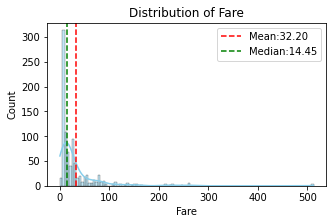

In [38]:
col=df["Fare"]
mean_val=np.mean(col)
median_val=np.median(col)
mode_value=col.mode()[0]
plt.figure(figsize=(5,3))
sns.histplot(col,kde=True,color="skyblue")
plt.axvline(mean_val,color="red",linestyle="--",label=f"Mean:{mean_val:.2f}")
plt.axvline(median_val,color="green",linestyle="--",label=f"Median:{median_val:.2f}")
plt.legend()
plt.title("Distribution of Fare")
plt.show()

# Finding the outliers

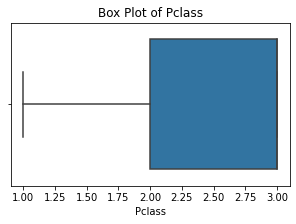

0.5
4.5
Number of outliers: 0


In [42]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df["Pclass"])
plt.title("Box Plot of Pclass")
plt.show()

#formula method
Q1=df["Pclass"].quantile(0.25)
Q3=df["Pclass"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

##filtering outliers
outliers=df[(df["Pclass"]<lower_bound) | (df["Pclass"]>upper_bound)]
print("Number of outliers:",len(outliers))

In [43]:
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


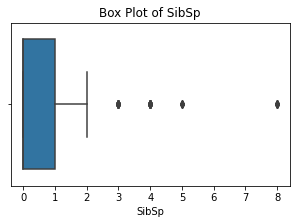

-1.5
2.5
Number of outliers: 46


In [45]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df["SibSp"])
plt.title("Box Plot of SibSp")
plt.show()

#formula method
Q1=df["SibSp"].quantile(0.25)
Q3=df["SibSp"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

##filtering outliers
outliers=df[(df["SibSp"]<lower_bound) | (df["SibSp"]>upper_bound)]
print("Number of outliers:",len(outliers))

In [46]:
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
7,0,3,1,2.0,3,1,21.0750,0,0,1
16,0,3,1,2.0,4,1,29.1250,0,1,0
24,0,3,0,8.0,3,1,21.0750,0,0,1
27,0,1,1,19.0,3,2,263.0000,0,0,1
50,0,3,1,7.0,4,1,39.6875,0,0,1
59,0,3,1,11.0,5,2,46.9000,0,0,1
63,0,3,1,4.0,3,2,27.9000,0,0,1
68,1,3,0,17.0,4,2,7.9250,0,0,1
71,0,3,0,16.0,5,2,46.9000,0,0,1
85,1,3,0,33.0,3,0,15.8500,0,0,1


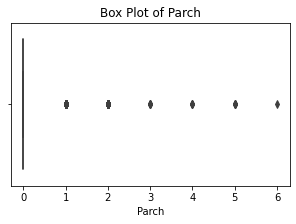

0.0
0.0
Number of outliers: 213


In [47]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df["Parch"])
plt.title("Box Plot of Parch")
plt.show()

#formula method
Q1=df["Parch"].quantile(0.25)
Q3=df["Parch"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

##filtering outliers
outliers=df[(df["Parch"]<lower_bound) | (df["Parch"]>upper_bound)]
print("Number of outliers:",len(outliers))

In [48]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


# Spliting into feature and target

In [51]:
X=df.iloc[:,1:11]

In [52]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [53]:
y=df[["Survived"]]

In [54]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [59]:
print("Feature Columns:")
print(X)
print("Target column:")
print(y)

Feature Columns:
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         3    1  22.0      1      0   7.2500           0           0   
1         1    0  38.0      1      0  71.2833           1           0   
2         3    0  26.0      0      0   7.9250           0           0   
3         1    0  35.0      1      0  53.1000           0           0   
4         3    1  35.0      0      0   8.0500           0           0   
..      ...  ...   ...    ...    ...      ...         ...         ...   
886       2    1  27.0      0      0  13.0000           0           0   
887       1    0  19.0      0      0  30.0000           0           0   
888       3    0  28.0      1      2  23.4500           0           0   
889       1    1  26.0      0      0  30.0000           1           0   
890       3    1  32.0      0      0   7.7500           0           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1 

# Comparing numerical value vs numerical value

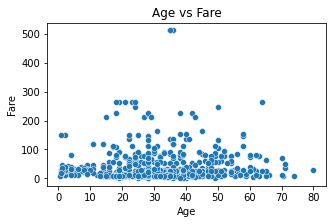

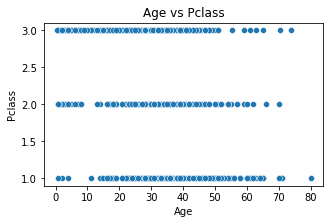

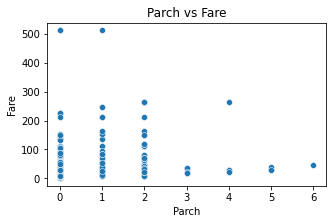

In [61]:
num_pairs=[{"Age","Fare"},{"Age","Pclass"},{"Fare","Parch"}]
for x,y in num_pairs:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[x],y=df[y])
    plt.title(f"{x} vs {y}")
    plt.axis